# Complex Numbers in Python

Contributors: Daniel Lay, Eric Flynn

A complex number $z=x+iy$ has a real part, $x$, and an imaginary part, $y$. In this notebook, we'll discuss:

- How to use complex numbers in Python, including common pitfalls
- When complex numbers show up in physics, and some basic numerical methods for such problems
- The Fourier transformation
- Contour integration, and how to visualize it

## The Basics

Python has native support for complex numbers. To write a complex number, such as $3+4i$, you write the code '3+4 * 1j':

In [1]:
my_complex_number = 3 + 4*1j
print("type(my_complex_number):",type(my_complex_number))

type(my_complex_number): <class 'complex'>


As you can see, the variable 'my_complex_number' is of class 'complex', which is Python's way of saying it's a complex number. Additionally, some operations respect that this is a complex number. For instance, the 'abs' function now behaves as the mathematical operation $|z|=\sqrt{x^2+y^2}$, as we can check with our complex variable:

In [2]:
print('abs(my_complex_number):',abs(my_complex_number))

abs(my_complex_number): 5.0


As with most mathematical operations you've encountered (e.g. matrix operations), it is easier to work with numpy, and indeed, numpy has support for complex numbers. You can make an array like normal, except with complex entries:

In [3]:
import numpy as np

my_complex_array = np.array([3+4*1j,5+6.7*1j])
print('my_complex_array:',my_complex_array)

my_complex_array: [3.+4.j  5.+6.7j]


To check that this is a complex array, you can print 'my_complex_array.dtype' (if you instead type 'type(my_complex_array)', you just get np.ndarray back - Python can't tell the type of data inside of a numpy array):

In [4]:
print('my_complex_array.dtype:',my_complex_array.dtype)

my_complex_array.dtype: complex128


**Conceptual check number** TODO: how would you implement the Pauli matrices in numpy?

Numpy also lets you multiply by scalars (real or complex), like you would expect:

In [5]:
print('2 * my_complex_array:',2*my_complex_array)
print('1j * my_complex_array):',1j*my_complex_array)
print('(2+3*1j) * my_complex_array):',(2+3*1j)*my_complex_array)

2 * my_complex_array: [ 6. +8.j  10.+13.4j]
1j * my_complex_array): [-4. +3.j -6.7+5.j]
(2+3*1j) * my_complex_array): [ -6. +17.j  -10.1+28.4j]


And, you can take the complex conjugate of the array (element-wise):

In [6]:
print('my_complex_array:',my_complex_array)
print('np.conjugate(my_complex_array):',np.conjugate(my_complex_array))

my_complex_array: [3.+4.j  5.+6.7j]
np.conjugate(my_complex_array): [3.-4.j  5.-6.7j]


**Conceptual check number** TODO: how would you take the *Hermitian conjugate* of 'my_complex_array' (i.e. the conjugate transpose)?

If you decide that you only care about the real part of an array, numpy lets you access that nicely:

In [7]:
print('np.real(my_complex_array):',np.real(my_complex_array))

np.real(my_complex_array): [3. 5.]


Suppose we want to use 'my_complex_array' somewhere else in our code - say, we want to make it the first two elements in a different array (e.g. when iteratively solving some system of equations). How might we do that? First, we initialize our array 'another_variable' like normal:

In [8]:
another_variable = np.zeros(5)

Now, let's make the first two elements equal to 'my_complex_array':

In [9]:
another_variable[:2] = my_complex_array
print('another_variable:',another_variable)

another_variable: [3. 5. 0. 0. 0.]


/tmp/ipykernel_363487/241474597.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  another_variable[:2] = my_complex_array


Oops! What happened?

You see a 'ComplexWarning' showed up. The issue is exactly as stated: numpy is discarding the imaginary part of 'my_complex_array'. In this case, it's because you started with an array of a *real* datatype, and numpy, rather than making 'another_variable' complex, takes the *real* part of 'my_complex_array'.

This is a common occurrence, and you should be aware of it. It happens especially in non-numpy functions, such as when plotting an array.

## The Fourier Transform

The Fourier transform is the backbone of an enormous amount of computational efforts - see https://en.wikipedia.org/wiki/Fourier_transform#Applications for examples. As such, it is implemented in an efficient manner via the *fast Fourier transform* (FFT). The Fourier transform, more than perhaps any other algorithm, is something you do *not* want to implement yourself - I can all but guarantee that numpy's implementation will be faster, and probably by orders of magnitude.

Numpy implements the FFT in the package numpy.fft, https://numpy.org/doc/stable/reference/routines.fft.html. To understand it, let's start with an example we can compute by hand:

$$ f(x) = \sin(x). $$

The Fourier transform is best accomplished by writing $f(x)$ as complex exponentials, so
\begin{align}
    f(x)=\frac{e^{ix}-e^{-ix}}{2i}.
\end{align}
Then, the Fourier transform is
\begin{align}
    \tilde{f}(k)=\frac{1}{2i}\int_{-\infty}^\infty dx\,e^{i2\pi kx}f(x)=\frac{1}{2i}\big[ \delta(k-1/2\pi)-\delta(k+1/2\pi)\big].
\end{align}
This dependence could have been read off with a little practice.

To accomplish this numerically, we first evaluate $f(x)$ on a grid, then use the np.fft package. When doing so, be aware that our convention above follows the convention used in numpy, https://numpy.org/doc/stable/reference/routines.fft.html#implementation-details, and your programming language of choice may use something different.

In [12]:
def f(x):
    return np.sin(x)

x = np.arange(256)

fEval = f(x)

my_fft = np.fft.fft(fEval)

print('my_fft:')
print(my_fft)

my_fft:
[ 1.45126613e+00+0.00000000e+00j  1.45189004e+00+2.66891368e-02j
  1.45376631e+00+5.34673357e-02j  1.45690866e+00+8.04247362e-02j
  1.46134019e+00+1.07653659e-01j  1.46709386e+00+1.35249768e-01j
  1.47421310e+00+1.63313315e-01j  1.48275261e+00+1.91950518e-01j
  1.49277947e+00+2.21275087e-01j  1.50437447e+00+2.51409977e-01j
  1.51763382e+00+2.82489403e-01j  1.53267128e+00+3.14661208e-01j
  1.54962069e+00+3.48089662e-01j  1.56863925e+00+3.82958819e-01j
  1.58991146e+00+4.19476588e-01j  1.61365410e+00+4.57879702e-01j
  1.64012240e+00+4.98439862e-01j  1.66961782e+00+5.41471395e-01j
  1.70249797e+00+5.87340899e-01j  1.73918920e+00+6.36479532e-01j
  1.78020296e+00+6.89398810e-01j  1.82615706e+00+7.46711196e-01j
  1.87780384e+00+8.09157253e-01j  1.93606788e+00+8.77641946e-01j
  2.00209715e+00+9.53283951e-01j  2.07733383e+00+1.03748371e+00j
  2.16361384e+00+1.13201921e+00j  2.26330990e+00+1.23918346e+00j
  2.37954197e+00+1.36198683e+00j  2.51649514e+00+1.50446259e+00j
  2.67991526e+00+

Well, that was... lackluster. Let's plot the fft instead.

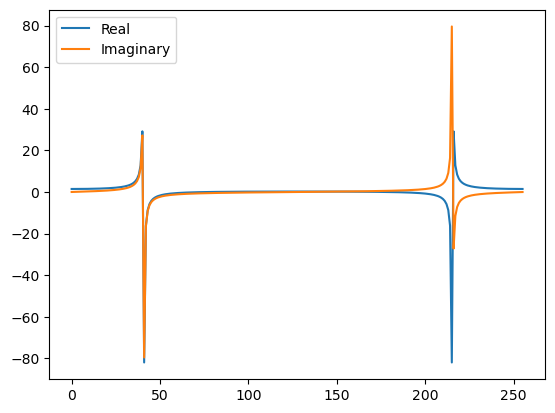

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(np.real(my_fft),label='Real')
ax.plot(np.imag(my_fft),label='Imaginary')

ax.legend()


Well, that looks weird. We see that there are two large frequencies, but they're not where we expect them to be.

To actually get the *frequencies* of the Fourier transform, we can use numpy.fft.fftfreq (see https://stackoverflow.com/a/59979450 for a well-explained example):

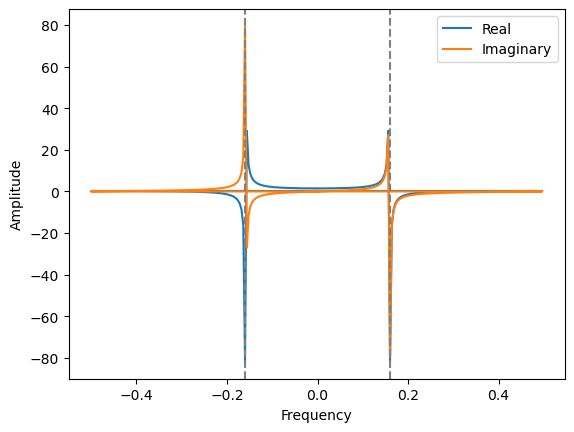

In [17]:
myFrequencies = np.fft.fftfreq(len(my_fft))

expectedFrequencies = [-1/(2*np.pi),1/(2*np.pi)]

fig, ax = plt.subplots()

ax.plot(myFrequencies,np.real(my_fft),label='Real')
ax.plot(myFrequencies,np.imag(my_fft),label='Imaginary')

ax.legend()
ax.set(xlabel='Frequency',ylabel='Amplitude')

for freq in expectedFrequencies:
    ax.axvline(freq,color='gray',ls='--')


Now, we see the peaks about where we expect them to be, which we double check by marking vertical lines on the same plot, at our expected frequencies. So, the FFT is indeed working as expected.

I will note that the *amplitude* of the FFT is not the simple $1/(2i)$ we expect from before. I believe that's due to an additional normalization factor numpy uses in its definition of the Fourier transform.

Lastly, I'll show an example with a more complicated function: one where you may not be able to visually identify the frequencies. Here, I'll take two oscillating functions, with very different frequencies and very different amplitudes:

$$ f(x) = \sin(x) + 0.01\sin(40x). $$

[Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

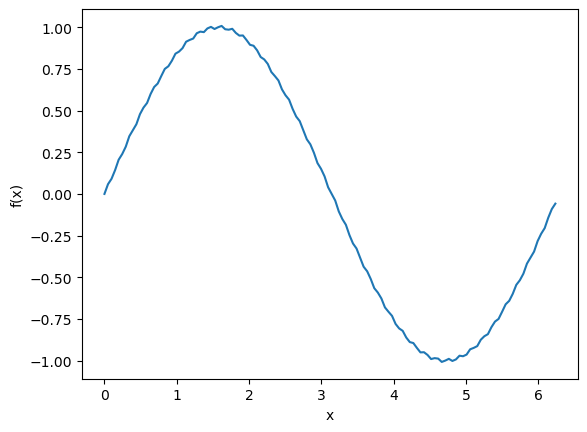

In [47]:
x = np.linspace(0,2*np.pi,128,endpoint=False)

f = lambda x: np.sin(x) + 0.01 * np.sin(40*x)
fEval = f(x)

fig, ax = plt.subplots()
ax.plot(x,fEval)

ax.set(xlabel='x',ylabel='f(x)')

By visually inspecting the plot, you clearly see the $\sin(x)$ behavior. If you look closely, you also see small oscillations around that - especially near the max/min values of $\sin(x)$. If you encounter this in *data*, however, it may be difficult to tell - is that real behavior, or is it just noise? 

The Fourier transform can help answer this, by looking at the frequencies that show up. In our example, we expect four frequencies: $\pm 1/(2\pi)$ and $\pm 1/(80\pi)$. What does the FFT recover?

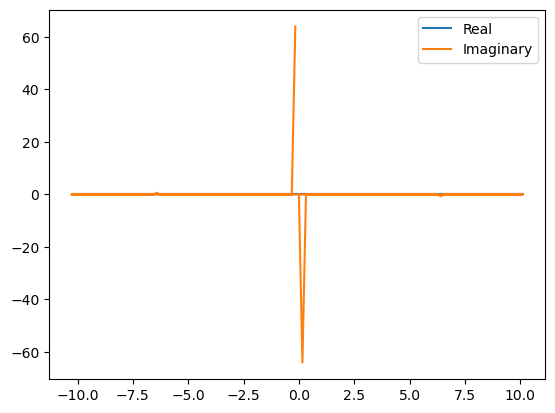

In [56]:
fftEval = np.fft.fft(fEval)

#When generating the frequencies, you have to tell numpy the sampling rate
sampleRate = len(x)/x[-1]
myFrequencies = np.fft.fftfreq(len(fftEval),d=1/sampleRate)

fig, ax = plt.subplots()
ax.plot(myFrequencies,np.real(fftEval),label='Real')
ax.plot(myFrequencies,np.imag(fftEval),label='Imaginary')

ax.legend()

You can see two large lines, and, if you squint, two smaller lines. That makes some sense - the amplitude of the high-frequency oscillation is much smaller than the low-frequency oscillation.

To extract the actual numbers, we can use numpy to look for maxima in the imaginary part of the FFT. There are a lot of different ways to do this; one way is as follows:

In [72]:
imagPart = np.abs(np.imag(fftEval))

#Finding desired indices
peakIndices = np.where(imagPart > 0.0001)
print('peakIndices:',peakIndices)
#Getting the frequency at those indices
print('Frequencies:',myFrequencies[peakIndices])

#What we expect
print('Expected frequencies:',[-1/(2*np.pi),1/(2*np.pi),-40/(2*np.pi),40/(2*np.pi)])

peakIndices: (array([  1,  40,  88, 127]),)
Frequencies: [ 0.16040813  6.41632526 -6.41632526 -0.16040813]
Expected frequencies: [-0.15915494309189535, 0.15915494309189535, -6.366197723675814, 6.366197723675814]


As you can see, the frequencies we get are pretty close to the expected values. To improve the agreement, we have to increase the number of sample points beyond 128 - give it a try!


# Differential Equation Example

Complex numbers commonly arise in differential equations. For example, consider the following equation of motion

$$
\begin{align}
\frac{d^{2}x}{dt^{2}} + 2\gamma \frac{dx}{dt} + \omega^{2} x = 0 \\
x(t = 0) = 0, \hspace{3mm} \frac{d x}{dt}(t = 0) = 1
\end{align}
$$
where $\gamma$ and $\omega$ are real numbers. This is Newton's second law for a harmonic oscillator with frequency $\omega$ however we added a first derivative term. The first derivative acts as a "friction term" that causes damping of the harmonic motion. The number $\gamma$ characterizes the strength of the friction.  We will solve this analytically and numerically using Scipy's ODE solver. The characteristic polynomial is 
$$
\begin{align}
r^{2} + 2\gamma r + \omega^{2} = 0 
\end{align}
$$
The roots of this equation are given by 
$$
\begin{align}
r = -\gamma \pm \sqrt{\gamma^{2} -  \omega^{2}} = -\gamma \pm  \gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}
\end{align}
$$
and the general solution is given by 
$$
\begin{align}
x(t) = c_{1} e^{r_{1} t}  + c_{2} e^{r_{2}t} = c_{1} e^{-\gamma t} e^{\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t} + c_{2} e^{-\gamma t} e^{-\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t}
\end{align}
$$
We will assume $\gamma\neq 0$. Now at this point, we note that if $ \frac{\omega^{2}}{\gamma^{2}} < 1$, then the square root function remains real and the solution is exponential. However, if $ \frac{\omega^{2}}{\gamma^{2}} > 1$, the square root turns imaginary and we have complex exponentials. This means we have wave-like solutions. For this example, complex numbers naturally arise from the differential equation and are necessary for understanding physics described by Newton's equation. Let's see how the solutions look. Taking into account the initial conditions, the unique solution is 
$$
\begin{align}
x(t) = \frac{e^{-\gamma t}}{2\sqrt{\gamma^{2} - \omega^{2}}}\Big( e^{\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t} -  e^{-\gamma\sqrt{1 -  \frac{\omega^{2}}{\gamma^{2}}}t}\Big)
\end{align}
$$


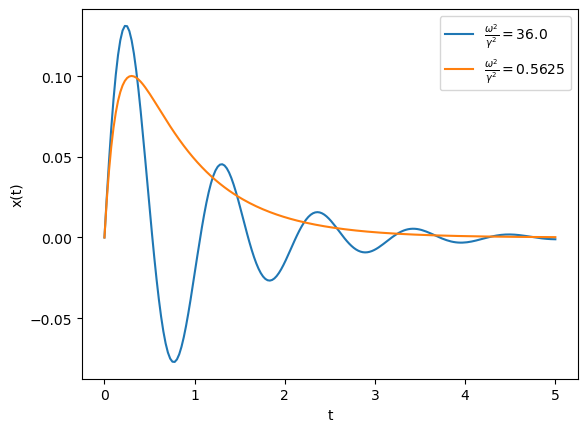

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define function for the exact solution
def x(t,gamma,omega):
    n1 = np.exp(-gamma*t)/(2*np.sqrt(gamma**2 - omega**2,dtype=complex))
    t1 = np.exp(gamma*np.sqrt(1 - omega**2 /gamma**2,dtype=complex)*t) 
    t2 = np.exp(-gamma*np.sqrt(1 - omega**2 /gamma**2,dtype=complex)*t)
    return n1*(t1 - t2)
# Define time grid to evaluate x(t) on
tArr = np.linspace(0,5,200)

# parameters for producing wave solutions
omega_wave = 6
gamma_wave = 1 
xArr_wave = x(tArr,gamma_wave,omega_wave)

# parameters for producing exponential solutions
omega_exp = 3
gamma_exp = 4
xArr_exp = x(tArr,gamma_exp,omega_exp)

#plot the two solutions
plt.plot(tArr,np.real(xArr_wave),label=r'$\frac{\omega^{2}}{\gamma^{2}} = $'+f'{(omega_wave/gamma_wave)**2}')
plt.plot(tArr,np.real(xArr_exp),label=r'$\frac{\omega^{2}}{\gamma^{2}} =$' +f'{(omega_exp/gamma_exp)**2}')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

# Numerical Solution
Now for fun, lets solve the same differential equation using scipy's ode integrator. Scipy's integration package requires one to rewrite your differential equation as a system of first order equations. Define the following
$$
\begin{align}
x &= u \\
\frac{dx}{dt} &= v
\end{align}
$$
Then, the 2nd order ODE becomes 
$$
\begin{align}
\frac{du}{dt} &= v \\
\frac{dv}{dt} &= -2 \gamma v - \omega^{2} u
\end{align}
$$

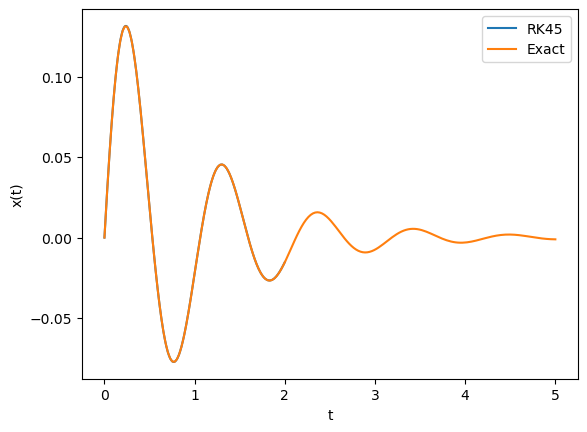

In [19]:
from scipy.integrate import solve_ivp

# initial conditions y0 = [x(t=0), dx/dt (t=0)]
y0 = [0.0, 1.0] 

# Define a function for scipy integrator to use.
def system(t,y, params):
    u, v = y
    dydt = [v, -2*params[0]*v - params[1]**2 *u]
    return dydt

sol = solve_ivp(system,t_span=[0,5],y0 = y0,t_eval= np.linspace(0,2,1000), args=[(gamma_wave, omega_wave)],method='RK45',dense_output=True)

plt.plot(sol.t, sol.y[0],label='RK45')
plt.plot(tArr,np.real(xArr_wave),label='Exact')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()